In [1]:
import os
import numpy as np
from PIL import Image
from src.data_handling.mmg_detection_datasets import *
from src.visualizations.plot_image import plot_image_opencv_fit_window
from src.data_augmentation.breast_density.data.resize_image import *
import torch

from src.preprocessing.histogram_standardization import get_hist_stand_landmarks, apply_hist_stand_landmarks



pathologies = None #['mass', 'calcifications', 'suspicious_calcifications', 'architectural_distortion'] # None to select all
status = ['Normal', 'Benign', 'Malignant'] #['Normal'] 
# Resize images keeping aspect ratio

# Call to the OPTIMAM Dataloader
csv_path = '/home/lidia-garrucho/datasets/INBREAST/INbreast_updated_cropped_breast.csv'
dataset_path = '/home/lidia-garrucho/datasets/INBREAST/AllPNG_cropped'
inbreast_clients = INBreastDataset(csv_path, dataset_path, detection=False, load_max=-1, 
                                cropped_to_breast=True)


for status in ['Normal', 'Benign', 'Malignant']:
    clients_selected = inbreast_clients.get_clients_by_status(status)
    print(f'Total clients selected by status ({status}): {len(clients_selected)}')

Total clients selected by status (Normal): 29
Total clients selected by status (Benign): 85
Total clients selected by status (Malignant): 49


In [10]:
85+49

134

In [2]:
import pandas as pd
pd.read_csv(csv_path)

,patient_id,laterality,view,acquisition_date,image_id,ACR,BIRADS,scan_path,calcification_mask,mass_mask,...,mass_0_y1,mass_0_y2,mass_1_x1,mass_1_x2,mass_1_y1,mass_1_y2,mass_2_x1,mass_2_x2,mass_2_y1,mass_2_y2
0,61b13c59bcba149e,R,CC,201001,22678622,4,1,61b13c59bcba149e/RIGHT_CC/scan_0.nii.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61b13c59bcba149e,L,CC,201001,22678646,4,3,61b13c59bcba149e/LEFT_CC/scan_0.nii.gz,NaN,61b13c59bcba149e/LEFT_CC/s0_mask_mass.nii.gz,...,827.0,1153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61b13c59bcba149e,R,MLO,201001,22678670,4,1,61b13c59bcba149e/RIGHT_MLO/scan_0.nii.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61b13c59bcba149e,L,MLO,201001,22678694,4,3,61b13c59bcba149e/LEFT_MLO/scan_0.nii.gz,NaN,61b13c59bcba149e/LEFT_MLO/s0_mask_mass.nii.gz,...,2209.0,2458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6bd24a0a42c19ce1,R,CC,201001,22614074,2,5,6bd24a0a42c19ce1/RIGHT_CC/scan_0.nii.gz,6bd24a0a42c19ce1/RIGHT_CC/s0_mask_calc.nii.gz,6bd24a0a42c19ce1/RIGHT_CC/s0_mask_mass.nii.gz,...,1479.0,1883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,45c7f44839fd9e68,L,MLO,201001,22613848,2,1,45c7f44839fd9e68/LEFT_MLO/scan_0.nii.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,f0f1a133837b5137,L,MLO,200802,24055725,4,2,f0f1a133837b5137/LEFT_MLO/scan_0.nii.gz,f0f1a133837b5137/LEFT_MLO/s0_mask_calc.nii.gz,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,f0f1a133837b5137,R,MLO,200802,24055752,4,2,f0f1a133837b5137/RIGHT_MLO/scan_0.nii.gz,f0f1a133837b5137/RIGHT_MLO/s0_mask_calc.nii.gz,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,f0f1a133837b5137,L,CC,200802,24055779,4,2,f0f1a133837b5137/LEFT_CC/scan_0.nii.gz,f0f1a133837b5137/LEFT_CC/s0_mask_calc.nii.gz,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
clients_selected = inbreast_clients.get_clients_by_status(status="Benign")

In [4]:
# for c in clients_selected:
#     for s in c.studies:
#         for image in s.images:
#             # print(image.__dir__())
#             print(image.status)

In [5]:
inbreast_clients = INBreastDataset(csv_path, dataset_path, detection=False, load_max=-1, 
                                cropped_to_breast=True)

In [6]:
inbreast_clients[0].get_images_by_status(['Benign']) #, 'Benign', 'Malignant'])

In [8]:
csv_path = '/home/lidia-garrucho/datasets/INBREAST/INbreast_updated_cropped_breast.csv'
dataset_path = '/home/lidia-garrucho/datasets/INBREAST/AllPNG_cropped'
inbreast_clients = INBreastDataset(csv_path, dataset_path, detection=False, load_max=-1, 
                                cropped_to_breast=True)

images_benign, images_normal, images_malignant = [], [], []
for c in inbreast_clients:
    for lists, status in zip([images_normal, images_benign, images_malignant], ['Normal', 'Benign', 'Malignant']):
        client_images_by_status = c.get_images_by_status(status=[status])
        for image in client_images_by_status:
            lists.append(image)
       
count_dict = {'Normal':0,'Benign':0, 'Malignant':0}      
for l, status in zip([images_normal, images_benign, images_malignant], ['Normal', 'Benign', 'Malignant']):
    print(f'Printing status {status}:')
    for i in l:
        # print(i.status)
        count_dict[status]+=1
    print(count_dict[status])
    
# for l, status in zip([images_normal, images_benign, images_malignant], ['Normal', 'Benign', 'Malignant']):
#     print(f'Printing status {status}:')
#     for i in l:
#         print(i.status)      

Printing status Normal:
67
Printing status Benign:
242
Printing status Malignant:
100


# Data Loader playground

In [12]:
subjects = INBreastDataset(csv_path, dataset_path, load_max=-1)
images_benign, images_normal, images_malignant = [], [], []
for c in subjects:
    for imlist, status in zip([images_normal, images_benign, images_malignant], ['Normal', 'Benign', 'Malignant']):
        client_images_by_status = c.get_images_by_status(status=[status])
        for image in client_images_by_status:
            imlist.append(image)
# images_benign, images_normal, images_malignant = [], [], []
# Balance the dataset
balance_to_min_index = min([len(images_benign), len(images_malignant)])
images_benign = images_benign[:balance_to_min_index]
images_malignant = images_malignant[:balance_to_min_index]
total_images = images_benign + images_malignant
for ims, status in zip([images_benign, images_malignant], ['benign', 'malignant']):
    print(f'Total images selected by status ({status}): {len(ims)}')

Total images selected by status (benign): 100
Total images selected by status (malignant): 100


In [13]:
import random
random.shuffle(total_images) 

# Data Split
training_images = total_images[:int(0.8*len(total_images))]
validation_images = total_images[int(0.8*len(total_images)):]
test_images = total_images[int(0.8*len(total_images)):]

images = validation_images

In [43]:
import pydicom as dicom

image=images[0]

if image.status=='Malignant' or image.status=='Interval Cancer':
    label = np.single(1)
elif image.status=='Benign' or image.status=='Normal':
    label = np.single(0)
# label = np.single(1) if image.status=='Malignant' else np.single(0)
# status = image.status # ['Benign', 'Malignant', 'Interval Cancer', 'Normal']
manufacturer = image.manufacturer # ['HOLOGIC, Inc.', 'Philips Digital Mammography Sweden AB', 'GE MEDICAL SYSTEMS', 'Philips Medical Systems', 'SIEMENS']
# view = image.view # MLO_VIEW = ['MLO','LMLO','RMLO', 'LMO', 'ML'] CC_VIEW = ['CC','LCC','RCC', 'XCCL', 'XCCM']
# laterality = image.laterality # L R
if ".dcm" in image.path:
    # If this doesn't work. Check Lidia's https://gitlab.com/eucanimage/BreastCancer/-/blob/master/src/preprocessing/mmg_utils.py
    img_dcm = dicom.dcmread(image.path)
    img_np = img_dcm.pixel_array
else:
    img_pil = Image.open(image.path).convert('RGB')
    img_np = np.array(img_pil)

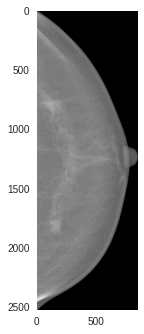

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.imshow(img_np, cmap='gray')
plt.grid(False)

In [44]:
channelwhat = img_np.transpose(2,0,1)[0]

In [46]:
channelwhat.shape

(2529, 848)

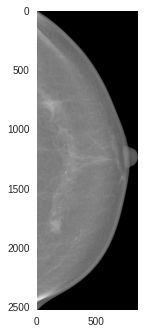

In [45]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.imshow(channelwhat, cmap='gray')
plt.grid(False)

In [15]:
img_np.shape

(2529, 848, 3)

In [16]:
def crop_new(arr):

    mask = arr != 0
    n = mask.ndim
    dims = range(n)
    slices = [None]*n

    for i in dims:
        mask_i = mask.any(tuple([*dims[:i], *dims[i+1:]]))
        slices[i] = (mask_i.argmax(), len(mask_i) - mask_i[::-1].argmax())

    return arr[[slice(*s) for s in slices]]

In [17]:
cropped_img = crop_new(img_np)

/home/akis-linardos/BFP/docker/fl_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


In [18]:
cropped_img.shape

(2529, 848, 3)

In [32]:
img_np.transpose(2,0,1).shape

(3, 2529, 848)

In [35]:
for c in img_np.transpose(2,0,1):
    print(crop_new(c).shape)

(2529, 848)
(2529, 848)
(2529, 848)


/home/akis-linardos/BFP/docker/fl_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


In [20]:
scale_size = (224, 224)

In [21]:
img_np = np.uint8(img_np) if img_np.dtype != np.uint8 else img_np.copy()
rescaled_img, scale_factor = imrescale(img_np, scale_size, return_scale=True, backend='pillow')
if len(rescaled_img.shape) > 2:
    image = torch.from_numpy(rescaled_img).permute(2,0,1)

In [23]:
crop_new(image).shape

TypeError: any() received an invalid combination of arguments - got (tuple), but expected one of:
 * ()
      didn't match because some of the arguments have invalid types: (!tuple!)
 * (int dim, bool keepdim)
 * (name dim, bool keepdim)
